In this tutorial we will see how to use a decision tree for classificatino using the iris dataset.
Visualization of both the result and the decision tree itself are also provided.

As usual we start by importing all necessary packages

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Add iris dataset

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data[:,0:3:2]
y = iris.target

As for the example for the k-Nearest Neighbor method we only keep two features of the whole dataset.

Then we can apply a decision tree classification, constraining the maximum depth of the tree to be 4

In [3]:
from sklearn import tree
dtr = tree.DecisionTreeClassifier(max_depth=4)
dtr.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In order to visualize the classification result we are going to ask the predictino for a collectino of points mapping the features space.

In [4]:
xx,yy = np.meshgrid(np.linspace(0.0,10.0,201),np.linspace(0.0,10.0,201))
pred = dtr.predict(np.c_[xx.ravel(),yy.ravel()])
Z = pred.reshape(np.shape(xx))

(0.0, 8.0)

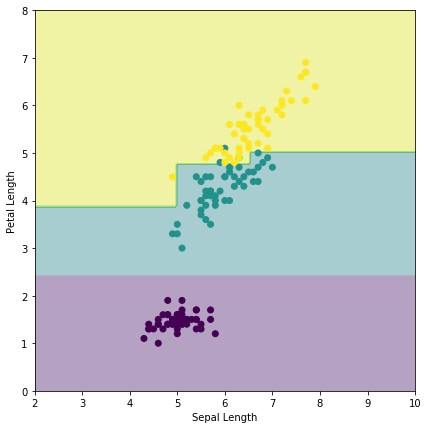

In [5]:
plt.figure(figsize=(7,7))
plt.contourf(xx,yy,Z,alpha=0.4)
plt.scatter(X.T[0],X.T[1],c=y)
plt.axis('scaled')
plt.xlabel('Sepal Length')
plt.ylabel('Petal Length')
plt.xlim(2.0,10.0)
plt.ylim(0.0,8.0)

Let's now export the decision tree to a pdf file

In [ ]:
import pydot
from sklearn.externals.six import StringIO

dot_data = StringIO()
f = tree.export_graphviz(dtr,out_file=dot_data,
                         feature_names=iris.feature_names,
                         class_names=iris.target_names,
                         filled=True,rounded=True)
graph = pydot.graph_from_dot_data(dot_data.getvalue())
graph.write_pdf('iris.pdf')